In [1]:
#1.  Let's import NumPy, pandas, SciPy.stats, and matplotlib:

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We download and load the dataset:
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'])

df.head()

,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",1998-05-10,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",Q,...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Each row corresponds to a match, and the 70 columns contain many player characteristics during that match:

print(f"Number of columns: {len(df.columns)}") #print("Number of columns: {}".format(len(df.columns)))
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",2012-01-16,GS
1175,2012,"Doha, Qatar",2012-02-01,250
1176,2012,"Doha, Qatar",2012-02-01,250
1177,2012,"Doha, Qatar",2012-02-01,250
1178,2012,"Doha, Qatar",2012-02-01,250


(0.0, 16.29310344827586)

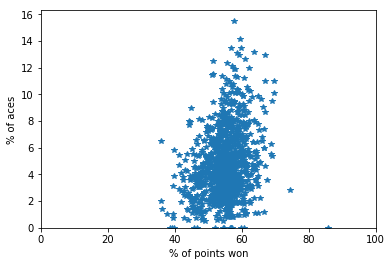

In [8]:
# Here, we only look at the proportion of points won, and the (relative) number of aces:

npoints = df['player1 total points total']
points = df['player1 total points won'] *100/ npoints
aces = df['player1 aces'] *100 / npoints

fig, ax = plt.subplots(1, 1)
ax.plot(points, aces, '*')
ax.set_xlabel('% of points won')
ax.set_ylabel('% of aces')
ax.set_xlim(0., 100.)
ax.set_ylim(0.)

In [12]:
# If the two variables were independent, we would not see any trend in the cloud of points. On this plot, 
# it is a bit hard to tell. Let's use pandas to compute a coefficient correlation.

# For simplicity, we create a new DataFrame object with only these fields. We also remove the rows where one field is missing (using dropna()):

df_bis = pd.DataFrame({'points': points, 'aces': aces}).dropna()
df_bis.tail()

,points,aces
1173,58.536585,2.439024
1174,47.101449,3.985507
1175,63.953488,4.651163
1176,60.606061,2.020202
1177,53.179191,6.936416


In [10]:
# Let's compute the Pearson's correlation coefficient between the relative number of aces in the match, and the number of points won:

df_bis.corr()

,points,aces
points,1.000000,0.255457
aces,0.255457,1.000000


<img src="pic8.png">
<img src="pic9.png">


In [13]:
# A correlation of ~0.26 seems to indicate a positive correlation between our two variables. 
# In other words, the more aces in a match, the more points the player wins (which is not very surprising!).

# Now, to determine if there is a statistically significant correlation between the variables, we use a chi-squared test
# of the independence of variables in a contingency table. 
# First, we binarize our variables. Here, the value corresponding to the number of aces is True if the player 
#is serving more aces than usual in a match, and False otherwise:

df_bis['result'] = (df_bis['points'] >
                    df_bis['points'].median())
df_bis['manyaces'] = (df_bis['aces'] >
                      df_bis['aces'].median())

print(df_bis.head())

      points      aces  result  manyaces
0  39.805825  3.883495   False     False
1  61.320755  7.547170    True      True
2  53.378378  5.405405   False      True
3  46.153846  2.307692   False     False
5  46.323529  0.735294   False     False


In [8]:
# Then, we create a contingency table, with the frequencies 
#of all four possibilities (True and True, True and False, and so on):

pd.crosstab(df_bis['result'], df_bis['manyaces'])

manyaces,False,True
result,,
False,300,214
True,214,299


In [14]:
# Finally, we compute the chi-squared test statistic and the associated p-value. 
# The null hypothesis is the independence between the variables. SciPy implements this test in scipy.stats.chi2_contingency(),
# which returns several objects. We're interested in the second result, which is the p-value:

st.chi2_contingency(_)

# (2.780e+01, 1.338e-07, 1,
#     array([[ 257.250,  256.749],
#            [ 256.749,  256.250]]))

# The p-value is much lower than 0.05, so we reject the null hypothesis and conclude that there is a statistically significant correlation between the proportion of aces and the proportion of points won in a match in this dataset.

(4.325444710669881, 0.3637497332734388, 4, array([[56.94974985,  4.0258599 ],
        [47.71398607,  3.37297045],
        [64.07509065,  4.52956051],
        [58.49141985,  4.13484278],
        [56.14652795,  3.96907899]]))

<img src="pic7.png">
